### Estrutura de Dados e Algoritmos
#### Carregamento e ordenação de Big Data

### a)

In [2]:
# importação das bibliotecas utilizadas no projeto

import csv
from itertools import islice
import pandas as pd
import time
import matplotlib.pyplot as plt

In [3]:
def partitions(file_path, n):
    # abertura do csv em modo leitura ("r") com o with para garantir que o arquivo é fechado após ser utilizado
    with open(file_path, "r") as file:
        # criar o objeto file_reader que permite ler o arquivo CSV como uma lista de listas - quando se utiliza a função open() anteriormente com o argumento "r", estamos a abrir o arquivo no modo de leitura. Por esse motivo, csv.reader(file) cria um objeto leitor para ler o arquivo, mas ainda não o lê
        file_reader = csv.reader(file)
        # ler a primeira linha que corresponde ao header fora do loop, guardando-o na variável header
        header = next(file_reader)
        # dentro do loop, vamos iterar sobre o ficheiro que abrimos, utilizando a função islice para dividir o arquivo em partições de tamanho "n"
        # a função iter serve para criar o iterador que chama a função lambda a cada iteração e esta utiliza o islice para criar as partições - a iteração continua ate a lista que o lambda devolve seja vazia - o lambda é necessário porque o iter requer um callable object
        for chunk in iter(lambda: list(islice(file_reader, n)), []):
            # o yield devolve um gerador que permite iterar sobre as partições do arquivo sem que tenham de ser carregadas todas na memória ao mesmo tempo
            yield chunk

In [4]:
# TESTES

a = partitions('data.csv', 10) # retorna um iterador com partições de 10 linhas cada apenas para efeitos de teste

# aceder à terceira partição
next(a)
next(a)
next(a)

[['-4477939'],
 ['5934533'],
 ['7235764'],
 ['2946405'],
 ['5685463'],
 ['-7649902'],
 ['-1107508'],
 ['-6516266'],
 ['1037602'],
 ['7594309']]

### b)

In [5]:
def sorting(lst, ascending):
    # Caso base -> quando o len() da lista é menor ou igual a 1
    if len(lst) <= 1:
        # devolve a lista, o número de iterações para dividir a lista, o mínimo e máximo, respetivamente
        return lst, 0, lst[0], lst[0]
    
    # Dividir a lista ao meio e chamar recursivamente a função sorting em cada parte
    # encontrar a posição do meio
    mid = len(lst) // 2
    # atribuição da parte esquerda da lista e respetivos valores à esquerda (conforme definido no caso base)
    left, left_iterations, left_min, left_max = sorting(lst[:mid], ascending)
    # realizar o mesmo para a parte direita da lista
    right, right_iterations, right_min, right_max = sorting(lst[mid:], ascending)

    # criar a lista vazia onde serão colocados os elementos ordenados
    merged = []
    # atribuições
    i = j = 0
    iterations = 0 
    
    # iterar pelas posições da lista e comparar o menor valor entre cada
    while i < len(left) and j < len(right):
        # caso se pretenda em ordem crescente
        if ascending:
            if left[i] <= right[j]:
                merged.append(left[i])
                i = i+1 
            else: 
                merged.append(right[j])
                j = j+1
        # para ordem decrescente
        else:
            if left[i] >= right[j]:
                merged.append(left[i])
                i = i+1
            else:
                merged.append(right[j])
                j = j+1
        iterations = iterations +1 

    # caso uma das partes termine primeiro, adicionar os restantes elementos em falta
    merged = merged + left[i:]
    merged = merged + right[j:]

    # devolve a lista ordenada e o número de iterações
    return merged, left_iterations + right_iterations + iterations, min(left_min, right_min), max(left_max, right_max)

In [6]:
# TESTES 

teste = [1,12,-21,3,12, -33, -51, 0, 12, 1000]
teste_ordenado, iteracoes, valor_min, valor_max = sorting(teste, True)
print(teste_ordenado)
print(iteracoes)
print(valor_min)
print(valor_max)

[-51, -33, -21, 0, 1, 3, 12, 12, 12, 1000]
20
-51
1000


### c)

In [7]:
def execute(data, n, ascending):
    # lista vazia onde iremos guardar os resultados de cada partição
    results = []
    
    # percorrer as várias as partições do ficheiro
    for i in partitions(data, n):
        # começar a contagem do tempo da iteração 
        start_time = time.time()
    
        # guardar a partição na variável partition_data
        partition_data = i[:]
        
        # transformar cada partição em listas de valores numéricos, em vez de listas de listas de strings
        partition_numbers = [[float(x) for x in row][0] for row in partition_data]
        
        # fazer a ordenação através do algoritmo merge sort desenvolvido acima para cada partição e medir o tempo de execução
        sorted_partition, iterations, min_val, max_val = sorting(partition_numbers, ascending)
        end_time = time.time()
        execution_time = end_time - start_time
        
        # criar um dicionário com as informações pedidas no enunciado
        partition_info = {
            'Tempo de execução': execution_time,
            'Número de iterações': iterations,
            'Valor mínimo': min_val,
            'Valor máximo': max_val
        }
        
        # adicionar o dicionário à lista de resultados de forma a guardar todos este conjunto de informações para cada uma das partições percorridas
        results.append(partition_info)
    
    # criar um DataFrame através do pandas com os resultados obtidos
    results_df = pd.DataFrame(results)
    
    return results_df


In [8]:
# TESTES 

execute("data.csv", 10000, True)

,Tempo de execução,Número de iterações,Valor mínimo,Valor máximo
0,0.049045,120448,-9999322.0,9998421.0
1,0.049548,120434,-9998989.0,9999685.0
2,0.050045,120398,-9997561.0,9997751.0
3,0.049549,120358,-9999516.0,9998508.0
4,0.050045,120514,-9998999.0,9993862.0
5,0.048548,120565,-9995856.0,9997894.0
6,0.047555,120504,-9992924.0,9998218.0
7,0.050037,120538,-9999841.0,9999404.0
8,0.048558,120489,-9999404.0,9992423.0
9,0.049044,120493,-9997038.0,9999991.0


### d)

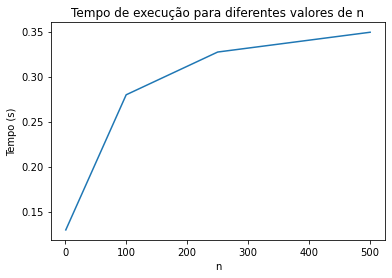

In [23]:
# valores a testar
test_values = [1, 100, 250, 500]

# criar a lista times onde iremos armazenar os resultados dos respetivos tempos de execução para cada valor a testar
times = []

# percorrer os diferentes valores a testar para n que foram escolhidos e guardados em test_values
for i in test_values:
    result = execute("data.csv", i, True)
    total_time = result['Tempo de execução'].sum()
    times.append(total_time)

# desenvolver o gráfico com os tempos de execução para cada valor de n
plt.plot(test_values, times)
plt.title('Tempo de execução para diferentes valores de n')
plt.xlabel('n')
plt.ylabel('Tempo (s)')
plt.show()

In [30]:
a = execute("data.csv", 1, True)
print("Mínimo:", a['Valor mínimo'].min())
print("Máximo:", a['Valor máximo'].max())

Mínimo: -9999841.0
Máximo: 9999991.0


Realizado por:
- João Dias nº 110305
- David Franco nº 110733 